In [1]:
!pip install altair
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import pandas as pd
import copy
import ipywidgets as widgets
import altair as alt
from ipywidgets import interact, interact_manual
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# PREPROCESSING
df = pd.read_csv('data/life_expectancy_years.csv').dropna()

# original copy of dataframe, needed for barplot function
df_orig = copy.copy(df)

names = df['country']
df = df.set_index('country').T
df = df.reset_index()
df['index'] = df['index'].astype(int)
df = df.rename(columns={'index': 'year'})
df

country,year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,28.2,35.4,28.8,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1,1801,28.2,35.4,28.8,27.0,33.5,33.2,34.0,34.0,34.4,...,37.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
2,1802,28.2,35.4,28.8,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
3,1803,28.2,35.4,28.8,27.0,33.5,33.2,34.0,34.0,34.4,...,37.3,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
4,1804,28.2,35.4,28.8,27.0,33.5,33.2,34.0,34.0,34.4,...,41.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2096,77.1,87.9,88.8,79.4,86.6,87.2,85.9,91.6,91.3,...,90.2,88.1,87.1,79.5,74.0,86.9,84.8,77.9,77.6,75.1
297,2097,77.3,88.0,88.9,79.5,86.7,87.3,86.0,91.7,91.5,...,90.3,88.2,87.2,79.6,74.2,87.0,84.9,78.0,77.7,75.3
298,2098,77.4,88.1,89.0,79.7,86.8,87.4,86.2,91.8,91.6,...,90.4,88.3,87.3,79.8,74.3,87.1,85.0,78.2,77.8,75.4
299,2099,77.5,88.2,89.1,79.8,86.9,87.5,86.3,91.9,91.7,...,90.5,88.4,87.4,79.9,74.4,87.2,85.2,78.3,78.0,75.5


In [3]:
print('# # # Dataset information # # # \n')
print(df_orig.info())
print(f'# # # Pandas built-in statistical discription of dataset columns # # # \n{df_orig.describe()}')
print(f'# # # Amount of countries in dataset # # # \n{df_orig.country.nunique()}')
print(f'# # # Amount of null entries per column # # # \n{df_orig.isna().sum()}')
print(f'# # # Overall amount of null entries in dataset # # # \n{df_orig.isna().sum().sum()}')
print(f'# # # Column names # # # \n{df_orig.columns}')

# # # Dataset information # # # 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 435.6+ KB
None
# # # Pandas built-in statistical discription of dataset columns # # # 
             1800        1801        1802        1803        1804        1805  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    31.502717   31.461957   31.478804   31.383152   31.459239   31.586413   
std      3.814689    3.806303    3.938674    3.962376    3.934674    4.010884   
min     23.400000   23.400000   23.400000   19.600000   23.400000   23.400000   
25%     29.075000   28.975000   28.900000   28.900000   28.975000   29.075000   
50%     31.750000   31.650000   31.550000   31.500000   31.550000   31.650000   
75%     33.825000   33.900000   33.825000   33.625000   33.725000   33.825000   
max     42.900000   40.300000   44.400000   44.800000   42.800000   44.3000

Dataset contains some null values, which are dropped in the preprocessing step

#### Descriptive Statistics

We decided to implement a few functions, that will help to discover stories that this particular data can tell us.

In [4]:
df_orig = df_orig.dropna()

# Descriptive statistics
@interact(years=widgets.IntRangeSlider(value=(1950, 2000), min=1800, max=2100, step=1, description='range slider'))
def barplot_top5(years):
    '''
    Function that plots top 5 countries depending on the attribute of interest and years
    
    :param year_from: lower boundary year of interest
    :param year_to: upper boundary year of interest
    
    :return: two bar plots, one for selected period of time and second for upper boundary year
    '''
    
    # search only entries with selected year
    year_from, year_to = years[0], years[1]
    year_on = str(year_to)
    fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharex=True)
    temp = df_orig.copy()
    # take top 5 countries
    maxes = temp[year_on].nlargest(5)
    # plot the bar plot using seaborn framework
    ax[0].bar(temp.country.loc[maxes.index], maxes)
    ax[0].set_title(f"Top 5 countries life expectancy over year {year_on}")
    
    # now search entries between two year values
    temp = df[df['year'].between(year_from, year_to, inclusive=True)]
    # take only country columns
    xx = [i for i in temp.columns[1:]]
    # create new list for tuples of format (country, mean)
    res = []
    for i in xx:
        # iterate by country and take mean
        means = temp[i].mean()
        res.append((i, means))
    # sort in descending order
    res = sorted(res, key=lambda x:x[1], reverse=True)
    # take top-5 countries
    best_means = res[:5]
    country_names, means = [i for i,j in best_means], [j for i,j in best_means]
    #plot the barplot
    ax[1].bar(country_names, means)
    ax[1].set_title(f"Top 5 countries mean life expectancy over period from {year_from} to {year_to}")
    plt.show()

interactive(children=(IntRangeSlider(value=(1950, 2000), description='range slider', max=2100, min=1800), Outp…

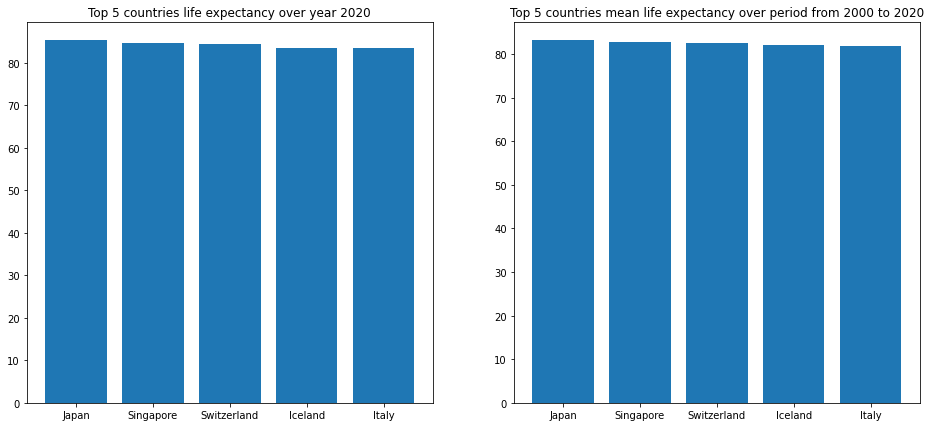

In [5]:
barplot_top5((2000, 2020))

By using this boxplot function, we can see which countries are leading in life expectancy during particular period of time. By particularly looking at years 2000 to 2020, we can conclude that Japan, Singapore, Switzerland, Iceland and Italy are leading in year 2020, as well as in period from year 2000 to 2020. 

In [6]:
# Descriptive statistics
# added init for temp -> so i can use in my plot too LG Robert
def linear_plot(countries, temp=df.copy()):
    '''
    Function to plot change of some attribute in selected countries over time
    
    :param countries: input countries list
    :return: multiple linear plot 
    '''
    # select each country from countries list
    for country in countries:  
        years, att = temp['year'], temp[country]
        # plot results
        plt.plot(years, att, label=f'{country}', lw=0.7)
        # set title
        plt.title(f'Change in life expectancy over period from 1800 to 2100')
        # set x and y labels
        plt.xlabel('year')
        plt.ylabel('life expectancy')
        # include plot legend for better navigation
        plt.legend()

In [7]:
# init
selection = df.columns.drop('year')

# create selection menu
toggle_y = widgets.SelectMultiple(options=selection, value=['Austria'], description="Country:", disabled=False)
smooth_slider =widgets.IntSlider(min=1, max=30, step=1, value=1, description="Smooth:")
mean_checkbox = widgets.Checkbox(False, description="Dataset Mean")

data_mean = df.mean(axis = 1).rolling(30).sum()/30

@interact(selected_countries=toggle_y, smooth=smooth_slider, mean=mean_checkbox)
def react_select(selected_countries, smooth, mean):
    
    # init
    local_df = df.copy()
    countries = df.columns.drop('year')
    selected_countries = list(selected_countries)
    
    # add mean to data
    local_df['mean'] = data_mean
    if mean:
        selected_countries.insert(0, 'mean')

    # smooth plot according to slider settings
    for c in countries:
        local_df[c] = local_df[c].rolling(smooth).sum()/smooth
    local_df.dropna()

    linear_plot(selected_countries, local_df)

interactive(children=(SelectMultiple(description='Country:', index=(8,), options=('Afghanistan', 'Albania', 'A…

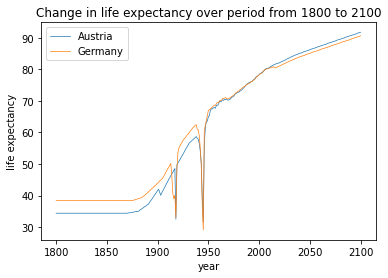

In [8]:
linear_plot(['Austria', 'Germany'])

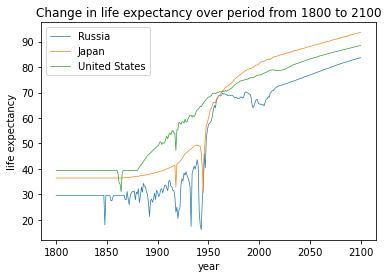

In [9]:
linear_plot(['Russia', 'Japan', 'United States'])

Linear plots can show us some interesting patterns in life expectancy changes during different events happened around the globe. For example, it can be clearly seen, that in period from 1900 to 1950 two World Wars took place and numerous countries had death rate spikes, which obviously lowered life expectancy. Using linear plot to represent each country can lead to quite a big amount of plots, so instead of overplotting we decided to show life expectancy changes using interactive choropleth plot (world map), where it is possible to choose time period of interest and have a look on all the countries around the globe at once.

In [10]:
# Country ISO codes
ISOs_Country = {
'ABW':'Aruba', 'AFG':'Afghanistan','AGO':'Angola','AIA':'Anguilla','ALA':'Åland Islands','ALB':'Albania',
'AND':'Andorra','ARE':'United Arab Emirates','ARG':'Argentina','ARM':'Armenia','ASM':'American Samoa',
'ATA':'Antarctica','ATF':'French Southern Territories','ATG':'Antigua and Barbuda','AUS':'Australia',
'AUT':'Austria','AZE':'Azerbaijan','BDI':'Burundi','BEL':'Belgium','BEN':'Benin',
'BES':'Bonaire, Sint Eustatius and Saba','BFA':'Burkina Faso','BGD':'Bangladesh','BGR':'Bulgaria',
'BHR':'Bahrain','BHS':'Bahamas','BIH':'Bosnia and Herzegovina','BLM':'Saint Barthélemy','BLR':'Belarus',
'BLZ':'Belize','BMU':'Bermuda','BOL':'Bolivia','BRA':'Brazil','BRB':'Barbados',
'BRN':'Brunei','BTN':'Bhutan','BVT':'Bouvet Island','BWA':'Botswana','CAF':'Central African Republic',
'CAN':'Canada','CCK':'Cocos (Keeling) Islands','CHE':'Switzerland','CHL':'Chile','CHN':'China',
'CIV':'Cote d\'Ivoire','CMR':'Cameroon','COD':'Congo, Dem. Rep.','COG':'Congo, Rep.',
'COK':'Cook Islands','COL':'Colombia','COM':'Comoros','CPV':'Cape Verde','CRI':'Costa Rica','CUB':'Cuba',
'CUW':'Curaçao','CXR':'Christmas Island','CYM':'Cayman Islands','CYP':'Cyprus','CZE':'Czech Republic',
'DEU':'Germany','DJI':'Djibouti','DMA':'Dominica','DNK':'Denmark','DOM':'Dominican Republic','DZA':'Algeria',
'ECU':'Ecuador','EGY':'Egypt','ERI':'Eritrea','ESH':'Western Sahara','ESP':'Spain','EST':'Estonia',
'ETH':'Ethiopia','FIN':'Finland','FJI':'Fiji','FLK':'Falkland Islands (Malvinas)','FRA':'France',
'FRO':'Faroe Islands','FSM':'Micronesia (Federated States of)','GAB':'Gabon',
'GBR':'United Kingdom','GEO':'Georgia','GGY':'Guernsey','GHA':'Ghana',
'GIB':'Gibraltar','GIN':'Guinea','GLP':'Guadeloupe','GMB':'Gambia','GNB':'Guinea-Bissau',
'GNQ':'Equatorial Guinea','GRC':'Greece','GRD':'Grenada','GRL':'Greenland','GTM':'Guatemala',
'GUF':'French Guiana','GUM':'Guam','GUY':'Guyana','HKG':'Hong Kong','HMD':'Heard Island and McDonald Islands',
'HND':'Honduras','HRV':'Croatia','HTI':'Haiti','HUN':'Hungary','IDN':'Indonesia','IMN':'Isle of Man',
'IND':'India','IOT':'British Indian Ocean Territory','IRL':'Ireland','IRN':'Iran',
'IRQ':'Iraq','ISL':'Iceland','ISR':'Israel','ITA':'Italy','JAM':'Jamaica','JEY':'Jersey','JOR':'Jordan',
'JPN':'Japan','KAZ':'Kazakhstan','KEN':'Kenya','KGZ':'Kyrgyz Republic','KHM':'Cambodia','KIR':'Kiribati',
'KNA':'Saint Kitts and Nevis','KOR':'South Korea','KWT':'Kuwait','LAO':'Lao',
'LBN':'Lebanon','LBR':'Liberia','LBY':'Libya','LCA':'Saint Lucia', 'LIE':'Liechtenstein','LKA':'Sri Lanka',
'LSO':'Lesotho','LTU':'Lithuania','LUX':'Luxembourg','LVA':'Latvia','MAC':'Macao',
'MAF':'Saint Martin (French part)','MAR':'Morocco','MCO':'Monaco','MDA':'Republic of Moldova',
'MDG':'Madagascar','MDV':'Maldives','MEX':'Mexico','MHL':'Marshall Islands','MKD':'North Macedonia',
'MLI':'Mali','MLT':'Malta','MMR':'Myanmar','MNE':'Montenegro','MNG':'Mongolia','MNP':'Northern Mariana Islands',
'MOZ':'Mozambique','MRT':'Mauritania','MSR':'Montserrat','MTQ':'Martinique','MUS':'Mauritius','MWI':'Malawi',
'MYS':'Malaysia','MYT':'Mayotte','NAM':'Namibia','NCL':'New Caledonia','NER':'Niger','NFK':'Norfolk Island',
'NGA':'Nigeria','NIC':'Nicaragua','NIU':'Niue','NLD':'Netherlands','NOR':'Norway','NPL':'Nepal','NRU':'Nauru',
'NZL':'New Zealand','OMN':'Oman','PAK':'Pakistan','PAN':'Panama','PCN':'Pitcairn','PER':'Peru','PHL':'Philippines',
'PLW':'Palau','PNG':'Papua New Guinea','POL':'Poland','PRI':'Puerto Rico','PRK':'North Korea',
'PRT':'Portugal','PRY':'Paraguay','PSE':'Palestine','PYF':'French Polynesia','QAT':'Qatar','REU':'Réunion',
'ROU':'Romania','RUS':'Russia','RWA':'Rwanda','SAU':'Saudi Arabia','SDN':'Sudan','SEN':'Senegal',
'SGP':'Singapore','SGS':'South Georgia and the South Sandwich Islands','SHN':'Saint Helena, Ascension and Tristan da Cunha',
'SJM':'Svalbard and Jan Mayen','SLB':'Solomon Islands','SLE':'Sierra Leone','SLV':'El Salvador','SMR':'San Marino',
'SOM':'Somalia','SPM':'Saint Pierre and Miquelon','SRB':'Serbia','SSD':'South Sudan','STP':'Sao Tome and Principe',
'SUR':'Suriname','SVK':'Slovak Republic','SVN':'Slovenia','SWE':'Sweden','SWZ':'Eswatini','SXM':'Sint Maarten (Dutch part)',
'SYC':'Seychelles','SYR':'Syria','TCA':'Turks and Caicos Islands','TCD':'Chad','TGO':'Togo',
'THA':'Thailand','TJK':'Tajikistan','TKL':'Tokelau','TKM':'Turkmenistan','TLS':'Timor-Leste','TON':'Tonga',
'TTO':'Trinidad and Tobago','TUN':'Tunisia','TUR':'Turkey','TUV':'Tuvalu','TWN':'Taiwan, Province of China',
'TZA':'Tanzania','UGA':'Uganda','UKR':'Ukraine','UMI':'United States Minor Outlying Islands',
'URY':'Uruguay','USA':'United States','UZB':'Uzbekistan','VAT':'Holy See','VCT':'Saint Vincent and the Grenadines',
'VEN':'Venezuela','VGB':'Virgin Islands (British)','VIR':'Virgin Islands (U.S.)','VNM':'Vietnam',
'VUT':'Vanuatu','WLF':'Wallis and Futuna','WSM':'Samoa','YEM':'Yemen','ZAF':'South Africa','ZMB':'Zambia',
'ZWE':'Zimbabwe'}


In [11]:
# Descriptive statistics
!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# widget to choose years range
@interact(years=widgets.IntRangeSlider(value=(1950, 2000), min=1800, max=2100, step=2, description='range slider'))
def world_map_plot(years):
    
    '''
        Plots interactive world map with mean life expectancy over some period.
        :param years: tuple containing lower and upper boundary years
        :returns: interactive world map
    '''
    
    # sort dataframe by chosen period of time
    temp = df[df['year'].between(years[0], years[1], inclusive=True)]
    xx = [i for i in temp.columns[1:]]
    res = []
    for i in xx:
        # get means for each country in selected period
        means = temp[i].mean()
        res.append((i, means))
    #res = sorted(res, key=lambda x:x[1], reverse=True)

    isos = {}
    for key, value in ISOs_Country.items():
        isos[value] = key
    
    # create list with iso codes for correctness of plot
    iso_codes = []
    erroneous_strs = [] # DEBUG
    for i in [i for i,j in res]:
        try:
            iso_codes.append(isos[i])
        except KeyError:
            erroneous_strs.append(i) # DEBUG
            iso_codes.append(' ')
    
    print(erroneous_strs) # DEBUG
    
    # create dictionary that will serve as pseudo dataframe input for plotly
    pseudo_df = {}
    pseudo_df['Countries'], pseudo_df['Mean Life Expectancy'] = [i for i,j in res], [j for i,j in res]
    pseudo_df['ISO'] = iso_codes
    
    # plot the map
    fig = px.choropleth(pseudo_df, locations = 'ISO', 
                      hover_name='Countries',
                      color='Mean Life Expectancy'
                       )

    fig.update_layout(title_text = 'World Life Expectancy',
                      title_x = 0.5,
                      geo=dict(
                      showframe = False,
                      showcoastlines = False)
                    )
    
    
    fig.show()

Defaulting to user installation because normal site-packages is not writeable


interactive(children=(IntRangeSlider(value=(1950, 2000), description='range slider', max=2100, min=1800, step=…

In [12]:
# world during World War I

world_map_plot((1914, 1918))

['Micronesia, Fed. Sts.', 'Moldova', 'St. Lucia', 'St. Vincent and the Grenadines']


In [13]:
# world during World War II

world_map_plot((1939, 1945))

['Micronesia, Fed. Sts.', 'Moldova', 'St. Lucia', 'St. Vincent and the Grenadines']


In [14]:
# world during the period from 1900 to 2000
world_map_plot((1900, 2000))

['Micronesia, Fed. Sts.', 'Moldova', 'St. Lucia', 'St. Vincent and the Grenadines']


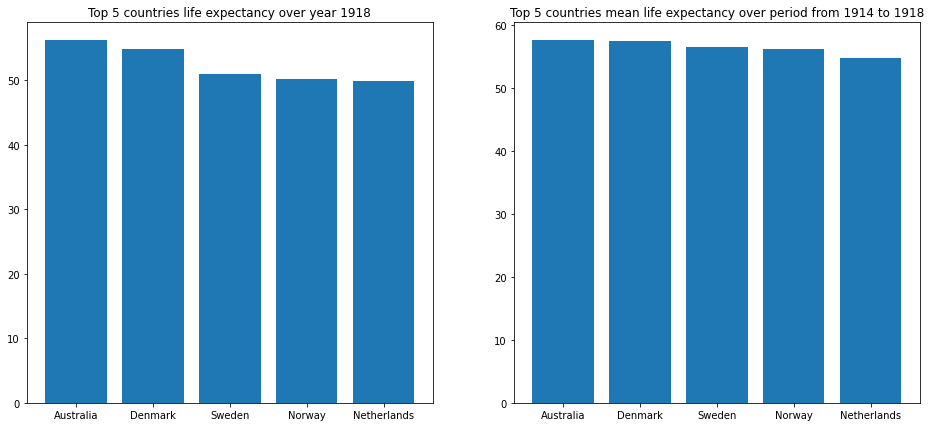

In [15]:
barplot_top5((1914, 1918))

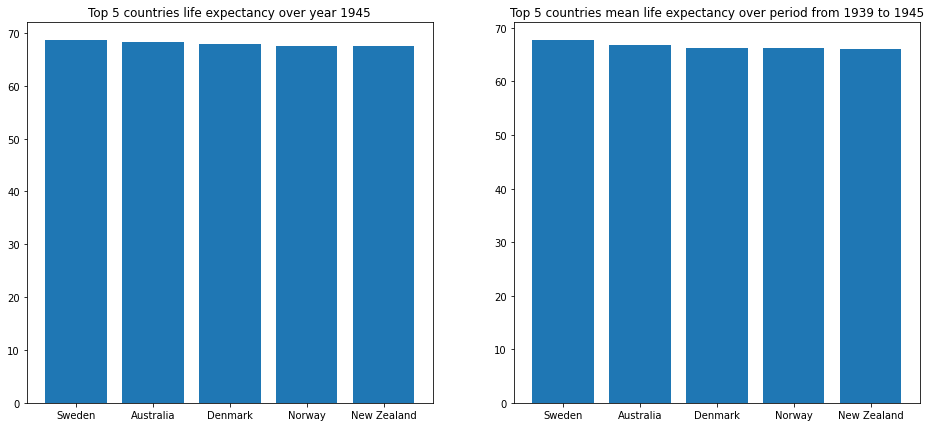

In [16]:
barplot_top5((1939, 1945))

It can be seen, that during both World Wars many countries' life expectancy was negatively affected. It can be also confirmed using multiple linear plots of few selected countries.

Features of descriptive statistics part:

- 1) Bar plot

It is possible to select year period of interest by adjusting slider

- 2) Multiple linear plot

Input is a list of desired countries, no additional widgets were added

- 3) Choropleth plot

It is possible to select year period of interest by adjusting slider



#### Correlations between attributes:

In [17]:
from scipy.stats import pearsonr

df_orig = df_orig.dropna()

# Correlations between attributes (Pearson)
@interact(years=widgets.IntRangeSlider(value=(1950, 2000), min=1800, max=2100, step=1, description='range slider'))
def pearson_correlation(years):
    year_from, year_to = years[0], years[1]
    year_on = str(year_to)
    temp = df_orig.copy()
    maxes = temp[year_on].nlargest(5)
    
    temp = df[df['year'].between(year_from, year_to, inclusive=True)]
    xx = [i for i in temp.columns[1:]]
    res = []
    for i in xx:
        means = temp[i].mean()
        res.append((i, means))
    res = sorted(res, key=lambda x:x[1], reverse=True)
    best_means = res[:5]
    second_best = res[5:10]
    country_names1, means1 = [i for i,j in best_means], [j for i,j in best_means]
    country_names2, means2 = [i for i,j in second_best], [j for i,j in second_best]
    corr, _ = pearsonr(means2, means1)
    print("Pearson’s Correlation: {}".format(corr))

interactive(children=(IntRangeSlider(value=(1950, 2000), description='range slider', max=2100, min=1800), Outp…

The Pearson Correlation shows that the live expectancy of the top 5 countrys differ pretty hard
compared to the top 5-9 top countrys.

####  Cluster similar items:

In [18]:
from sklearn import decomposition

# define all demensionality reduction methods:

def pca(data_frame):
    array = np.delete(data_frame.to_numpy(), 0, axis=1)
    pca = decomposition.PCA(n_components=2)
    pos = pca.fit(array).transform(array)
    pos_T = pca.fit(array.T).transform(array.T)
    
    df_country = pd.DataFrame(data=pos_T, columns=['x', 'y'], index=data_frame.columns.drop('year')).reset_index()
    df_year = pd.DataFrame(data=pos, columns=['x', 'y'], index=data_frame['year']).reset_index()
    
    return df_country, df_year

from sklearn import manifold

def tsne(data_frame, perplexity=30):
    array = np.delete(data_frame.to_numpy(), 0, axis=1)
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity)
    pos = tsne.fit_transform(array)
    pos_T = tsne.fit_transform(array.T)
    
    df_country = pd.DataFrame(data=pos_T, columns=['x', 'y'], index=data_frame.columns.drop('year')).reset_index()
    df_year = pd.DataFrame(data=pos, columns=['x', 'y'], index=data_frame['year']).reset_index()
    
    return df_country, df_year

def se(data_frame):
    array = np.delete(data_frame.to_numpy(), 0, axis=1)
    se = manifold.SpectralEmbedding(n_components=2, affinity='rbf')
    pos = se.fit_transform(array)
    pos_T = se.fit_transform(array.T)
    
    df_country = pd.DataFrame(data=pos_T, columns=['x', 'y'], index=data_frame.columns.drop('year')).reset_index()
    df_year = pd.DataFrame(data=pos, columns=['x', 'y'], index=data_frame['year']).reset_index()
    
    return df_country, df_year

In [19]:
def add_country_codecs(data_frame):
    '''Adds country codecs to each country in the the dataframe
    Countries must be in a column called 'country'
    :param data_frame:
    :return data_frame:
    '''
    
    # get codecs form csv file
    codes = pd.read_csv('data/ISO_3166-2_Codes_of_Countries.csv', sep=';')
    codes['Numeric code'].astype(int)
    codes = codes.set_index('name').T

    # surch for every country in the dataframe the correct codec
    numerics = []
    alpha3 = []
    for name in data_frame['country']:
        try:
            numerics.append(codes[name]['Numeric code'])
            alpha3.append(codes[name]['Alpha-3 code'])
        except:
            numerics.append(0)
            alpha3.append(name)
    
    # add codecs to data frame
    data_frame['Numeric code'] = numerics
    data_frame['Alpha-3 code'] = alpha3

    return data_frame

In [20]:
def plot_reduced(data_orig, data_country, df_year, title='Plot'):

    '''
    Plot function for dimensionalaity reduction!
    :param data_orig: original data frame before dimensionality rediction
    :param data_country: dataframe reduced to 2 dimensions with respect to countries
    :param data_year: dataframe reduced to 2 dimensions with respect to years
    :return: altair plot
    '''
    
    # create selector brushes
    brush_year = alt.selection_interval()
    brush_country = alt.selection_interval()
    nearest_line = alt.selection(type='single', nearest=True, on='mouseover',
                                fields=['country'])

    
    # add country codecs to dataframe -> important to join with world map
    data_country = add_country_codecs(data_country)

    shapefile  = alt.topo_feature('https://vega.github.io/vega-datasets/data/world-110m.json', 'countries')
    
    # dimensionality reduced to countries
    # create scatterplot
    country_Chart = alt.Chart(data_country, title='life expectancy reduced to countries').mark_point().encode(
        y ='y',
        x ='x',
        color=alt.condition(brush_country, alt.value('#1f77b4'), alt.value('lightgray')),
        tooltip=['country']
    ).add_selection(
        brush_country
    ).properties(width=400, height=300)
    
    # plot map
    country_map = alt.Chart(shapefile).mark_geoshape().encode(
        color=alt.condition(brush_country, alt.value('#1f77b4'), alt.value('lightgray')),
        tooltip=[
            alt.Tooltip("country:O", title="country"),
            alt.Tooltip("Alpha-3 code:O", title="code"),
        ]
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(data_country, "Numeric code", ['country', 'x', 'y', 'Numeric code', 'Alpha-3 code']),
    ).project(
        type='equirectangular'
    ).properties(
        width=800, 
        height=400
    )
    
    # create linear plot
    loc = data_orig.copy()
    loc = loc.melt('year')
    alt.data_transformers.disable_max_rows()
    
    # create mean plot
    base_line = alt.Chart(loc)
    mean_linear_plot = base_line.mark_line().encode(
        x=alt.X('year:N', axis=alt.Axis(values=list(range(1800, 2101, 10))) ),
        y=alt.Y('total:Q', title='life expectancy mean', sort='ascending'),
        color=alt.value("#000099")
    ).transform_lookup(
        lookup="country",
        from_=alt.LookupData(data_country, "country", ['country', 'x', 'y', 'Numeric code', 'Alpha-3 code']),
    ).transform_filter(
        brush_country
    ).transform_aggregate(
        total='mean(value)',
        groupby=["year"]
    ).properties(width=400, height=300)

    # plot countries linear
    countries_linear_plot = base_line.mark_line(opacity=0.15).encode(
        x=alt.X('year:N', axis=alt.Axis(values=list(range(1800, 2101, 10)))),
        y=alt.Y('value:Q', title='', sort='ascending'),
        opacity = alt.condition(nearest_line, alt.value(0.15), alt.value(1.0)),
        color='country:N',
        tooltip=['country']
    ).transform_lookup(
        lookup="country",
        from_=alt.LookupData(data_country, "country", ['country', 'x', 'y', 'Numeric code', 'Alpha-3 code']),
    ).transform_filter(
        brush_country
    ).add_selection(
        nearest_line
    ).properties(width=400, height=300)
    
    
    # dimensionality reduced to years
    # create scatter plot
    year_Chart = alt.Chart(df_year, title='life expectancy reduced to years').mark_point().encode(
        y ='y',
        x ='x',
        color=alt.condition(brush_year, alt.value('#1f77b4'), alt.value('lightgray')),
        tooltip=['year']
    ).add_selection(
        brush_year
    ).properties(width=400, height=300)
    
    # create yearplot
    year_bar = alt.Chart(df_year).mark_point().encode(
        y = alt.Y('year:N', scale=alt.Scale(zero=False), axis=alt.Axis(values=list(range(1800, 2101, 10))), sort='ascending' ),        
        color=alt.condition(brush_year, alt.value('#1f77b4'), alt.value('lightgray')),
        tooltip=['year']
    ).add_selection(
        brush_year
    ).properties(width=30, height=300)
    
    return ((country_Chart | (countries_linear_plot+mean_linear_plot).interactive() ) 
            & country_map  
            & (year_Chart | year_bar) )

In [21]:
from ipywidgets import HBox, VBox
from IPython.display import display

# creat interactive plot for dimensionlity reduciton

# Create buttons for dimensionality reduction method
method_selection = widgets.ToggleButtons(options=['PCA', 'TSNE', 'Spectral Embedding'], description=' ')
# create setting widgets
year_slider = widgets.IntRangeSlider(value=[1800, 2100], min=1800, max=2100, step=1, description='Year:')
perplexity_slider = widgets.IntSlider(min=1, max=150, step=1, value=1, description="TSNE Perplexity:")

# create widget box for visu
main_box = VBox(children = [method_selection, year_slider, perplexity_slider])
display(main_box)

@interact_manual()
def update():
    '''Update Plots on button click
    '''
    
    year_start = year_slider.value[0] - 1800
    year_end = year_slider.value[1] - 1800
    df_loc = df.loc[year_start:year_end]
    
    if method_selection.value == 'PCA':
        return plot_reduced(df_loc, *pca(df_loc))
    elif method_selection.value == 'TSNE':
        return plot_reduced(df_loc, *tsne(df_loc, perplexity_slider.value))
    if method_selection.value == 'Spectral Embedding':
        return plot_reduced(df_loc, *se(df_loc))


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

For clustering similar items we created an interactive plot where you can choose the dimensionality reduction technique and furhter important settings. The visualisation contains 2 main parts, "data reduced with respect to the countries" and "data reduced with respect to years".

Settings:
- First you can choose between the different dimensionality reduction techniques
- Then we added a slider to select the years you are interessted in. The dataset contains an approximation of the future data up to the year 2100 which might lead to useless dimensionality reduced data or you just wan to focus on a specific time range.
- The last settings you find are specific settings for the according selected method (here just tsne perplexity)

dimensionality reduction technique:
- PCA
- tsne
- Spectral Embedding
- others are simple to add

1st part "dimensionality reduction with respect to the countries":
- This is the more interessting part and contains 3 plots
- In the first plot you see the result from the dim. red. tech. in a 2 dimensional plot
- The second plot shows the mean of all selected countries to get more insights of the selected cluster, in the foreground. Furhter you see each individual country timeline in the background for detailed information. This plot was a tradoff, it should show the country charts of the selected countries but the problem was: if there is no country selected or a alot countries the plot becomes very useless. So the opacity of the background is set very low but these makes it a bit hard to see the exact lines.
- In the 3rd plot you can see the selcted countries on the world map to see location correlation between the clusters.
- Result: Basically the dim. red. tech. finds clusters of similar patterns. Sometimes it findes clusters of locally connected countries what is quite obvious and some times countries spread over the whole world have very similar charts, but therefore it is hard to find some connections of these countries. Therefore it would be now interessting to connect our dataset with other datasets (e.g. wealth) to find the reason for such connections. One Cluster very often shown are the countries in south afrika. They have one of the lowest lief expectancys and there is a drop from 1985 - 2010, tsne clusters these countries very well. 

2nd part "dimensionality reduction with respect to years":
- This part contains of two plots
- In the first plot you see the result from the dim. red. tech. in a 2 dimensional plot with respect to the years
- In the second plot you see the timeline where the selected years are displayed
- Result: All reduction techniques recognize the year of WWI as an outlier, it has a very huge impact on almost every country, further WWII can be seen in most plots but not so extereme than WWI. 